In [53]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")

In [54]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [55]:
# Determine the number of unique values in each column 
application_df.nunique().head(1)

APPLICATION_TYPE    17
dtype: int64

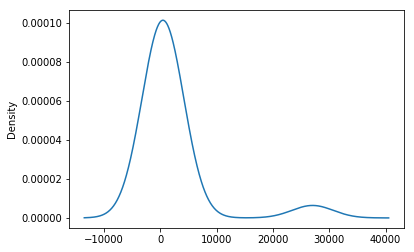

In [56]:
# Visualize the value counts of APPLICATION_TYPE
application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [57]:
# Look at APPLICATION_TYPE value counts for binning
app_num =application_df["APPLICATION_TYPE"].value_counts()

In [58]:
# Replace Bins into dataframe- APPLICATION
replace_app= app_num[app_num < 5000].index.tolist()

for i in replace_app:
    application_df.APPLICATION_TYPE= application_df.APPLICATION_TYPE.replace(i,"Other")
    
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [59]:
# Check CLASSIFICATION 
class_col= application_df["CLASSIFICATION"].value_counts()
class_col.head(1)

C1000    17326
Name: CLASSIFICATION, dtype: int64

In [60]:
# Replace Bins into dataframe- CLASSIFICATION
replace_class= class_col[class_col < 5000].index.tolist()

for j in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(j, "Other")
    
application_df.CLASSIFICATION.value_counts().head(1)

C1000    17326
Name: CLASSIFICATION, dtype: int64

In [61]:
# Generate our categorical variable lists 
application_categorical = application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_df[application_categorical].nunique().head(1)

APPLICATION_TYPE    2
dtype: int64

In [62]:
# Create a OneHotEncoder instance 
enc= OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder unsing categorical list 
encode_df= pd.DataFrame(enc.fit_transform(application_df[application_categorical]))

# Add the encoded variable names to the dataframe 
encode_df.columns= enc.get_feature_names(application_categorical)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C2000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# Merge One-Hot encoded features and drop the originals
prep_application_df= application_df.merge(encode_df,left_index=True, right_index=True).drop(columns= application_categorical)
prep_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Drop Noisy Features

In [65]:
# Drop Noisy Features 
drop_noisy_application_df= prep_application_df.drop(columns= ["USE_CASE_Other","AFFILIATION_Other"])

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Regional,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
# Split the data 
y=drop_noisy_application_df["IS_SUCCESSFUL"].values
X=drop_noisy_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [67]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [70]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 100
hidden_nodes2 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 2s 1ms/step - loss: 0.5978 - accuracy: 0.7011
Epoch 2/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5882 - accuracy: 0.7079
Epoch 3/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5857 - accuracy: 0.7074
Epoch 4/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5839 - accuracy: 0.7082
Epoch 5/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5832 - accuracy: 0.7089
Epoch 6/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.7107
Epoch 7/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5817 - accuracy: 0.7103
Epoch 8/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5811 - accuracy: 0.7103
Epoch 9/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5808 - accuracy: 0.7113
Epoch 10/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5807 - accura

858/858 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7165
Epoch 82/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7167
Epoch 83/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5728 - accuracy: 0.7166
Epoch 84/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5729 - accuracy: 0.7166
Epoch 85/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5727 - accuracy: 0.7167
Epoch 86/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.7166
Epoch 87/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5729 - accuracy: 0.7161
Epoch 88/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5728 - accuracy: 0.7174
Epoch 89/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5728 - accuracy: 0.7174
Epoch 90/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5727 - accuracy: 

858/858 [==============================] - 1s 2ms/step - loss: 0.5717 - accuracy: 0.7172
Epoch 161/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5717 - accuracy: 0.7172
Epoch 162/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.7171
Epoch 163/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5776 - accuracy: 0.7170
Epoch 164/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.7175
Epoch 165/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5713 - accuracy: 0.7172
Epoch 166/200
858/858 [==============================] - 1s 1ms/step - loss: 0.5712 - accuracy: 0.7180
Epoch 167/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.7175
Epoch 168/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5715 - accuracy: 0.7174
Epoch 169/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5711 - a

# 3 hidden layers

In [73]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 100
hidden_nodes2 = 50
hidden_node3= 25

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               3200      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 15,851
Trainable params: 15,851
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5966 - accuracy: 0.7011
Epoch 2/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5870 - accuracy: 0.7076
Epoch 3/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5850 - accuracy: 0.7098
Epoch 4/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5835 - accuracy: 0.7094
Epoch 5/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5826 - accuracy: 0.7103
Epoch 6/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5817 - accuracy: 0.7108
Epoch 7/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5819 - accuracy: 0.7106
Epoch 8/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5811 - accuracy: 0.7116
Epoch 9/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5810 - accuracy: 0.7119
Epoch 10/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5802 - accura

858/858 [==============================] - 2s 2ms/step - loss: 0.5730 - accuracy: 0.7169
Epoch 82/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5726 - accuracy: 0.7169
Epoch 83/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5724 - accuracy: 0.7168
Epoch 84/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5721 - accuracy: 0.7167
Epoch 85/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5724 - accuracy: 0.7168
Epoch 86/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5728 - accuracy: 0.7164
Epoch 87/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5722 - accuracy: 0.7167
Epoch 88/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.7171
Epoch 89/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5722 - accuracy: 0.7168
Epoch 90/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 

858/858 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.7180
Epoch 161/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5709 - accuracy: 0.7174
Epoch 162/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.7177
Epoch 163/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5703 - accuracy: 0.7171
Epoch 164/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5711 - accuracy: 0.7177
Epoch 165/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7176
Epoch 166/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5706 - accuracy: 0.7175
Epoch 167/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.7173
Epoch 168/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.7173
Epoch 169/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5712 - a

# Adding epochs 

In [75]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=500, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.7180
Epoch 2/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5719 - accuracy: 0.7175
Epoch 3/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5703 - accuracy: 0.7176
Epoch 4/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7174
Epoch 5/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7176
Epoch 6/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5703 - accuracy: 0.7176
Epoch 7/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5702 - accuracy: 0.7179
Epoch 8/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5702 - accuracy: 0.7178
Epoch 9/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5708 - accuracy: 0.7177
Epoch 10/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5704 - accura

858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7181
Epoch 82/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5700 - accuracy: 0.7180
Epoch 83/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5696 - accuracy: 0.7183
Epoch 84/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5696 - accuracy: 0.7177
Epoch 85/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5716 - accuracy: 0.7180
Epoch 86/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7184
Epoch 87/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7180
Epoch 88/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.7179
Epoch 89/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7181
Epoch 90/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 

858/858 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7181
Epoch 161/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7181
Epoch 162/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7180
Epoch 163/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7182
Epoch 164/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7181
Epoch 165/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5693 - accuracy: 0.7182
Epoch 166/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7180
Epoch 167/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5692 - accuracy: 0.7181
Epoch 168/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.7183
Epoch 169/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5695 - a

858/858 [==============================] - 2s 2ms/step - loss: 0.5690 - accuracy: 0.7188
Epoch 240/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5691 - accuracy: 0.7187
Epoch 241/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5689 - accuracy: 0.7182
Epoch 242/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7176
Epoch 243/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7178
Epoch 244/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5689 - accuracy: 0.7184
Epoch 245/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5691 - accuracy: 0.7182
Epoch 246/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5689 - accuracy: 0.7184
Epoch 247/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7189
Epoch 248/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5698 - a

858/858 [==============================] - 1s 2ms/step - loss: 0.5686 - accuracy: 0.7186
Epoch 319/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.7185
Epoch 320/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.7186
Epoch 321/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5681 - accuracy: 0.7188
Epoch 322/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5700 - accuracy: 0.7182
Epoch 323/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5688 - accuracy: 0.7183
Epoch 324/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5684 - accuracy: 0.7188
Epoch 325/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.7186
Epoch 326/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7182
Epoch 327/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - a

858/858 [==============================] - 2s 2ms/step - loss: 0.5677 - accuracy: 0.7186
Epoch 398/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5696 - accuracy: 0.7188
Epoch 399/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5690 - accuracy: 0.7189
Epoch 400/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5679 - accuracy: 0.7190
Epoch 401/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5678 - accuracy: 0.7191
Epoch 402/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5680 - accuracy: 0.7185
Epoch 403/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5681 - accuracy: 0.7186
Epoch 404/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5682 - accuracy: 0.7185
Epoch 405/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5678 - accuracy: 0.7189
Epoch 406/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5681 - a

858/858 [==============================] - 2s 2ms/step - loss: 0.5681 - accuracy: 0.7186
Epoch 477/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5685 - accuracy: 0.7184
Epoch 478/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5679 - accuracy: 0.7189
Epoch 479/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5675 - accuracy: 0.7187
Epoch 480/500
858/858 [==============================] - 2s 2ms/step - loss: 0.5680 - accuracy: 0.7187
Epoch 481/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.7185
Epoch 482/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5679 - accuracy: 0.7186
Epoch 483/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7187
Epoch 484/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5676 - accuracy: 0.7190
Epoch 485/500
858/858 [==============================] - 1s 2ms/step - loss: 0.5679 - a

# Change activation functions

In [81]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 100
hidden_nodes2 = 50
hidden_nodes3= 25
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="sigmoid"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="sigmoid"))

# Third Hidden Layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes3, activation="sigmoid"))

# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               3200      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 26        
Total params: 15,851
Trainable params: 15,851
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 2s 2ms/step - loss: 0.6240 - accuracy: 0.6734
Epoch 2/200
858/858 [==============================] - 1s 2ms/step - loss: 0.6031 - accuracy: 0.6912
Epoch 3/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5964 - accuracy: 0.6934
Epoch 4/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.6960
Epoch 5/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.6961
Epoch 6/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5920 - accuracy: 0.6981
Epoch 7/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5903 - accuracy: 0.7007
Epoch 8/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5891 - accuracy: 0.7014
Epoch 9/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5876 - accuracy: 0.7035
Epoch 10/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5861 - accura

858/858 [==============================] - 2s 2ms/step - loss: 0.5728 - accuracy: 0.7158
Epoch 82/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5728 - accuracy: 0.7155
Epoch 83/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5725 - accuracy: 0.7169
Epoch 84/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5729 - accuracy: 0.7166
Epoch 85/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5728 - accuracy: 0.7161
Epoch 86/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5726 - accuracy: 0.7165
Epoch 87/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5724 - accuracy: 0.7161
Epoch 88/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.7166
Epoch 89/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5722 - accuracy: 0.7168
Epoch 90/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 

858/858 [==============================] - 1s 2ms/step - loss: 0.5701 - accuracy: 0.7176
Epoch 161/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5702 - accuracy: 0.7176
Epoch 162/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5701 - accuracy: 0.7172
Epoch 163/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5702 - accuracy: 0.7174
Epoch 164/200
858/858 [==============================] - 1s 2ms/step - loss: 0.5701 - accuracy: 0.7174
Epoch 165/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7176
Epoch 166/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7180
Epoch 167/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5700 - accuracy: 0.7175
Epoch 168/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5703 - accuracy: 0.7173
Epoch 169/200
858/858 [==============================] - 2s 2ms/step - loss: 0.5699 - a

In [82]:
# Export our model to HDF5 file
nn2.save("AlphabetSoupCharity_optimzation.h5")